In [33]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('./heart.csv')

In [34]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [35]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [37]:
df.index[df.duplicated()]
df.drop(axis="rows", labels=df.index[df.duplicated()], inplace=True)

In [38]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [39]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [40]:
df.duplicated().sum()
# removing all duplicates

0

In [41]:
len(df)
# note the length of dataset

302

In [42]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  ta

In [43]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [44]:
data_array = df.to_numpy()
rand.shuffle(data_array)
Y = data_array[:,13]
X = np.delete(data_array, 13, axis=1)

In [45]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0.

In [46]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [46.,  1.,  0., ...,  1.,  2.,  3.],
       [52.,  1.,  0., ...,  2.,  3.,  3.],
       [64.,  1.,  0., ...,  1.,  1.,  3.]])

In [47]:
X = X.astype(np.float64)
X.shape

(302, 13)

In [48]:
Xtrain = X[:int(0.7*len(X))]
Ytrain = Y[:int(0.7*len(Y))]
Xtest = X[int(0.7*len(X)):]
Ytest = Y[int(0.7*len(Y)):]


In [49]:
def prob_col(X, Y):
    classify = [[],[]]
    for i in range (X.shape[0]):
        if(Y[i] == 1):
            classify[1].append(X[i])
        else:
            classify[0].append(X[i])
    
    for j in range(0,len(classify)):
        classify[j] = np.array(classify[j])

    zero_probability = len(classify[0])/(len(classify[0]) + len(classify[1]))
    one_probability = len(classify[1])/(len(classify[0]) + len(classify[1]))
    
    probability_values = []
    probability_values.append(zero_probability)
    probability_values.append(one_probability)

    return np.array(probability_values, dtype=object), np.array(classify, dtype=object)




In [50]:
prob_col(X,Y)

(array([0.5529801324503312, 0.4470198675496689], dtype=object),
 array([array([[52.,  1.,  0., ...,  2.,  2.,  3.],
               [52.,  1.,  0., ...,  2.,  2.,  3.],
               [53.,  1.,  0., ...,  0.,  0.,  3.],
               ...,
               [44.,  1.,  0., ...,  2.,  1.,  2.],
               [61.,  1.,  0., ...,  1.,  1.,  3.],
               [46.,  1.,  0., ...,  1.,  2.,  3.]]),
        array([[50.,  0.,  1., ...,  2.,  0.,  2.],
               [71.,  0.,  0., ...,  1.,  0.,  2.],
               [58.,  0.,  0., ...,  1.,  0.,  2.],
               ...,
               [35.,  0.,  0., ...,  2.,  0.,  2.],
               [52.,  1.,  0., ...,  2.,  3.,  3.],
               [64.,  1.,  0., ...,  1.,  1.,  3.]])], dtype=object))

In [51]:
class_prob, classify = prob_col(Xtrain, Ytrain)
Mean = []
std_Deviation = []
for i in range(classify.shape[0]):
    std_Deviation.append(np.std(classify[i], axis=0))
    Mean.append(np.mean(classify[i], axis=0))

means=np.array(Mean)
stddev=np.array(std_Deviation)

In [52]:
Ytrain = Ytrain.reshape((Xtrain.shape[0], 1))

In [53]:
Xtest.shape[0]

91

In [54]:

def likely(X, means, stddev):
    likelihood = 1
    for i in range(len(X)):
        likelihood *= (np.exp(-0.5*((X[i]-means[i])/stddev[i])**2))/(stddev[i]*(np.sqrt(2*np.pi)))
    return likelihood


In [55]:
Ytest = Ytest.reshape((Xtest.shape[0], 1))

In [56]:
prob_given_features = np.zeros((2))
Y_pred = np.zeros((Ytest.shape[0], Ytest.shape[1]))
for k in range(Xtest.shape[0]):
    for i in range(2):
        # two classes
        likelihood = likely(Xtest[k], means[i], stddev[i])
        # calcualating gaussian distribution
        prob_given_features[i] = likelihood*class_prob[i]
    Y_pred[k] = np.argmax(prob_given_features)


In [57]:
def F1_score(y_true, y_pred):
  True_Pos= np.sum(np.multiply([i==1 for i in y_pred], y_true))
  True_Neg = np.sum(np.multiply([i==0 for i in y_pred], [not(j) for j in y_true]))
  False_Pos = np.sum(np.multiply([i==1 for i in y_pred], [not(j) for j in y_true]))
  False_Neg = np.sum(np.multiply([i==0 for i in y_pred], y_true))
  if((True_Pos!=0 or False_Pos!=0) and (True_Pos!=0 or False_Neg!=0)):
    precision = True_Pos/(True_Pos+False_Pos)
    recall = True_Pos/(True_Pos+False_Neg)
    if (precision != 0 and recall != 0):
      f1 = (2 * precision * recall) / (precision + recall)
    else:
      f1=0
  else:
    f1 = 0
  return f1

In [58]:
def accuracy_score(y_exp,y_pred):
    
    n = len(y_exp)

    y_exp= y_exp.target

    misclassifications = 0
    for i in range(n):
      if y_pred[i] != y_exp[i]:
        misclassifications +=1

    accuracy = (1-(misclassifications/n))*100

    return accuracy

In [59]:
Y_pred = Y_pred.reshape((Y_pred.shape[0]))

In [60]:
Ytest = Ytest.reshape((Ytest.shape[0]))

In [61]:
from sklearn.metrics import f1_score, accuracy_score

In [62]:
print(F1_score(Ytest, Y_pred))
# print(get_accuracy(Ytest,Y_pred))


print(f1_score(Ytest, Y_pred))

print(accuracy_score(Ytest, Y_pred))

0.7727272727272727
0.7727272727272727
0.7802197802197802


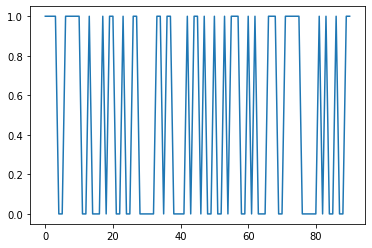

In [63]:
plt.plot(Ytest)

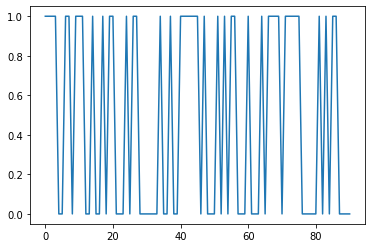

In [64]:
plt.plot(Y_pred)